# Importing libraries

In [1]:

# data manipulation
import pandas as pd
import numpy as np

# data vizualisation
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning Models
import lightgbm as lgb
import xgboost as xgb
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Useful Objects
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler

# for applying some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Reading the data from the excel file

In [2]:
df = pd.read_excel("ahs_insurance_sample.xlsx")

df

,BUYI,AMTI,CONFEE,ZSMHC,IFFEE,HHAGE,HHSEX,ZINC2,ZINC,ZINCN,...,BUILT,CLIMB,FRSTOC,EVROD,EROACH,CRACKS,HOLES,WINTERNONE,AIR,AIRSYS
0,1,1600,115,4240,1.0,34,2,159972,159972,100000,...,2002,-6,2.0,2,2,2,2,2.0,2,1
1,1,1650,225,3502,1.0,43,1,156772,156772,-6,...,2002,-6,1.0,2,1,1,2,1.0,2,1
2,1,2160,-6,5014,1.0,60,1,1488496,1488496,-9,...,2001,-6,1.0,2,2,2,2,1.0,2,1
3,1,900,215,4609,1.0,37,1,124944,124944,125000,...,2001,-6,2.0,2,2,2,2,1.0,2,1
4,1,1400,65,4891,1.0,33,2,149972,149972,175000,...,1995,-6,2.0,2,2,2,2,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51803,1,550,-6,979,2.0,51,1,94196,94196,-6,...,1970,-6,NaN,2,2,2,2,1.0,2,1
51804,1,800,-6,1277,2.0,70,2,66030,66030,-6,...,1970,-6,NaN,2,2,2,2,1.0,2,1
51805,0,-6,-6,517,2.0,68,2,24998,24999,-6,...,1995,-6,1.0,2,2,2,2,1.0,1,2
51806,0,-6,-6,426,2.0,71,2,13132,4000,-6,...,1960,-6,NaN,2,2,2,2,2.0,2,2


# Exploring the data

In [3]:
df.describe()


,BUYI,AMTI,CONFEE,ZSMHC,IFFEE,HHAGE,HHSEX,ZINC2,ZINC,ZINCN,...,BUILT,CLIMB,FRSTOC,EVROD,EROACH,CRACKS,HOLES,WINTERNONE,AIR,AIRSYS
count,51808.000000,51808.000000,51808.000000,51808.000000,50456.000000,51808.000000,51808.000000,5.180800e+04,5.180800e+04,51808.000000,...,51808.000000,51808.000000,15500.000000,51808.000000,51808.000000,51808.000000,51808.000000,51625.000000,51808.000000,51808.000000
mean,0.961512,911.117395,24.243283,1495.422387,1.752676,54.412658,1.440550,8.845448e+04,8.634571e+04,11254.150942,...,1970.876139,-5.678428,1.485613,1.807752,1.897969,1.953096,1.992858,1.188475,1.833906,1.231586
std,0.192374,836.462508,107.904924,1182.448110,0.431461,15.495271,0.496458,9.704151e+04,9.610321e+04,43345.652098,...,25.523757,1.556997,0.499809,0.394071,0.302691,0.211435,0.084207,0.391094,0.372169,0.421850
min,0.000000,-6.000000,-9.000000,0.000000,1.000000,15.000000,1.000000,-3.440000e+02,-3.440000e+02,-2049.000000,...,1919.000000,-6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,450.000000,-6.000000,675.000000,2.000000,43.000000,1.000000,3.419425e+04,3.231600e+04,-6.000000,...,1950.000000,-6.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,1.000000,700.000000,-6.000000,1228.000000,2.000000,54.000000,1.000000,6.584000e+04,6.359600e+04,-6.000000,...,1975.000000,-6.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,1104.000000,-6.000000,1910.000000,2.000000,65.000000,2.000000,1.109960e+05,1.090000e+05,-6.000000,...,1990.000000,-6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,5582.000000,1110.000000,12595.000000,2.000000,93.000000,2.000000,2.977104e+06,2.977104e+06,410311.000000,...,2011.000000,21.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51808 entries, 0 to 51807
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BUYI        51808 non-null  int64  
 1   AMTI        51808 non-null  int64  
 2   CONFEE      51808 non-null  int64  
 3   ZSMHC       51808 non-null  int64  
 4   IFFEE       50456 non-null  float64
 5   HHAGE       51808 non-null  int64  
 6   HHSEX       51808 non-null  int64  
 7   ZINC2       51808 non-null  int64  
 8   ZINC        51808 non-null  int64  
 9   ZINCN       51808 non-null  int64  
 10  ZINCH       48479 non-null  float64
 11  QSS         51808 non-null  int64  
 12  QSELF       51808 non-null  int64  
 13  QRENT       51808 non-null  int64  
 14  QRETIR      51808 non-null  int64  
 15  VALUE       51808 non-null  int64  
 16  REGION      51808 non-null  int64  
 17  METRO3      51808 non-null  int64  
 18  CONDO       51808 non-null  int64  
 19  UNITSF      51808 non-nul

Notice that they are indeed some missing values, we must handle them.
Let's take a look at the null values of each column


In [5]:
df.isnull().sum().sort_values(ascending=False)

MOBILTYP      49868
FRSTOC        36308
ZINCH          3329
IFFEE          1352
WINTERNONE      183
ROOMS             0
CELLAR            0
TYPE              0
BUILT             0
CLIMB             0
BUYI              0
UNITSF            0
EVROD             0
EROACH            0
CRACKS            0
HOLES             0
AIR               0
LOT               0
METRO3            0
CONDO             0
AMTI              0
REGION            0
VALUE             0
QRETIR            0
QRENT             0
QSELF             0
QSS               0
ZINCN             0
ZINC              0
ZINC2             0
HHSEX             0
HHAGE             0
ZSMHC             0
CONFEE            0
AIRSYS            0
dtype: int64

There are 5 columns that contain null values, we will deal with them later on the code. Now let's explore more; We will see if there are duplicate values.

In [6]:
df.duplicated().sum()

0

# Exploratory analysis of the BUYI (target) column


In [7]:
df.BUYI.value_counts()

1    49814
0     1994
Name: BUYI, dtype: int64

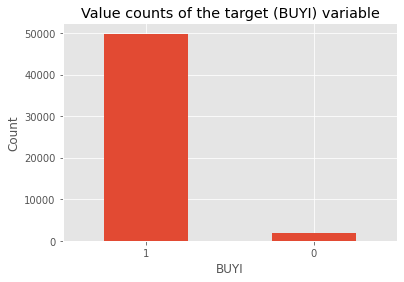

In [8]:
df.BUYI.value_counts().plot(kind="bar")
plt.title("Value counts of the target (BUYI) variable")
plt.xlabel("BUYI")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()


We can see that the 0 values are a lot less than the 1s. Consequently, most probably we will use f1_score as a metric, and we can also use oversampling or undersampling

Now let's take a look at the other columns
c

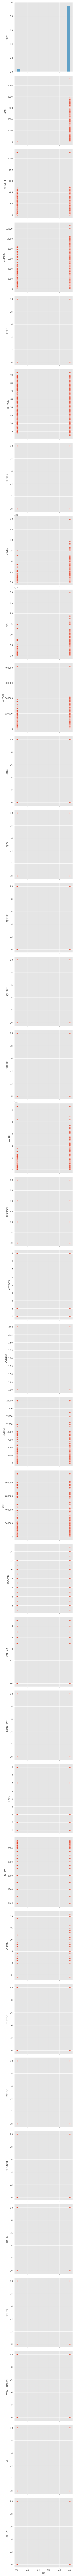

In [9]:
xColumns = list(df.columns).remove("BUYI")
sns.pairplot(df,x_vars=['BUYI'],
                  y_vars=xColumns,height=5)


From these plots, we can see that there are some features that are uniformely distributed, and some others that present some anomalies. We need to look at the relation between these features and the target, as well as the correlation between them

Let's use a catplot to plot the ZSMHC and HHAGE with BUYI


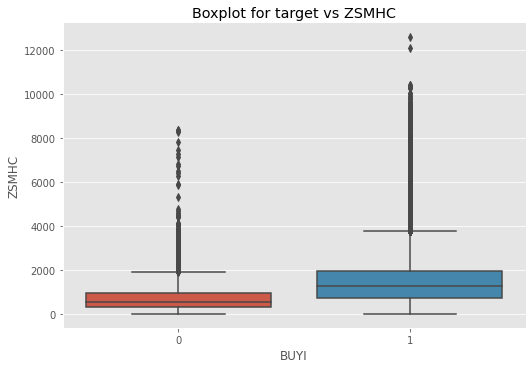

In [10]:
sns.catplot(x="BUYI", y="ZSMHC", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs ZSMHC")
plt.show()


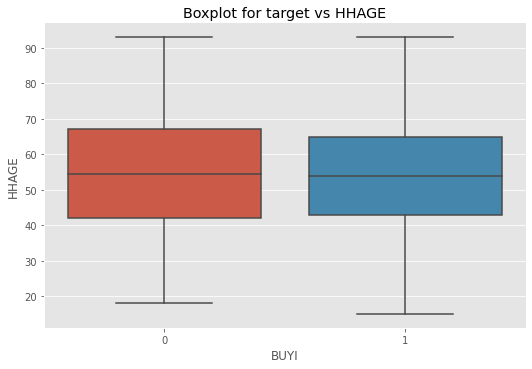

In [11]:
sns.catplot(x="BUYI", y="HHAGE", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs HHAGE")
plt.show()


For ZSMHC, we can see that the bigger the values the closer they get to 1 as a target, as for the HHAGE there is barely no difference. We will use a scatter plot to illustrate these result and make them clearer.


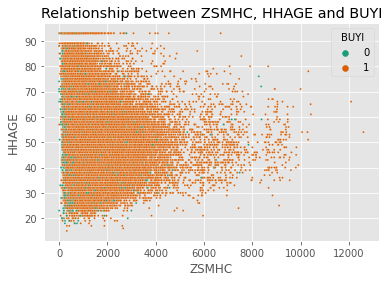

In [12]:
sns.scatterplot(x="ZSMHC", y="HHAGE", hue="BUYI", data=df, palette="Dark2", s=4)
plt.title("Relationship between ZSMHC, HHAGE and BUYI")
plt.show()


# Correlation matrix plot

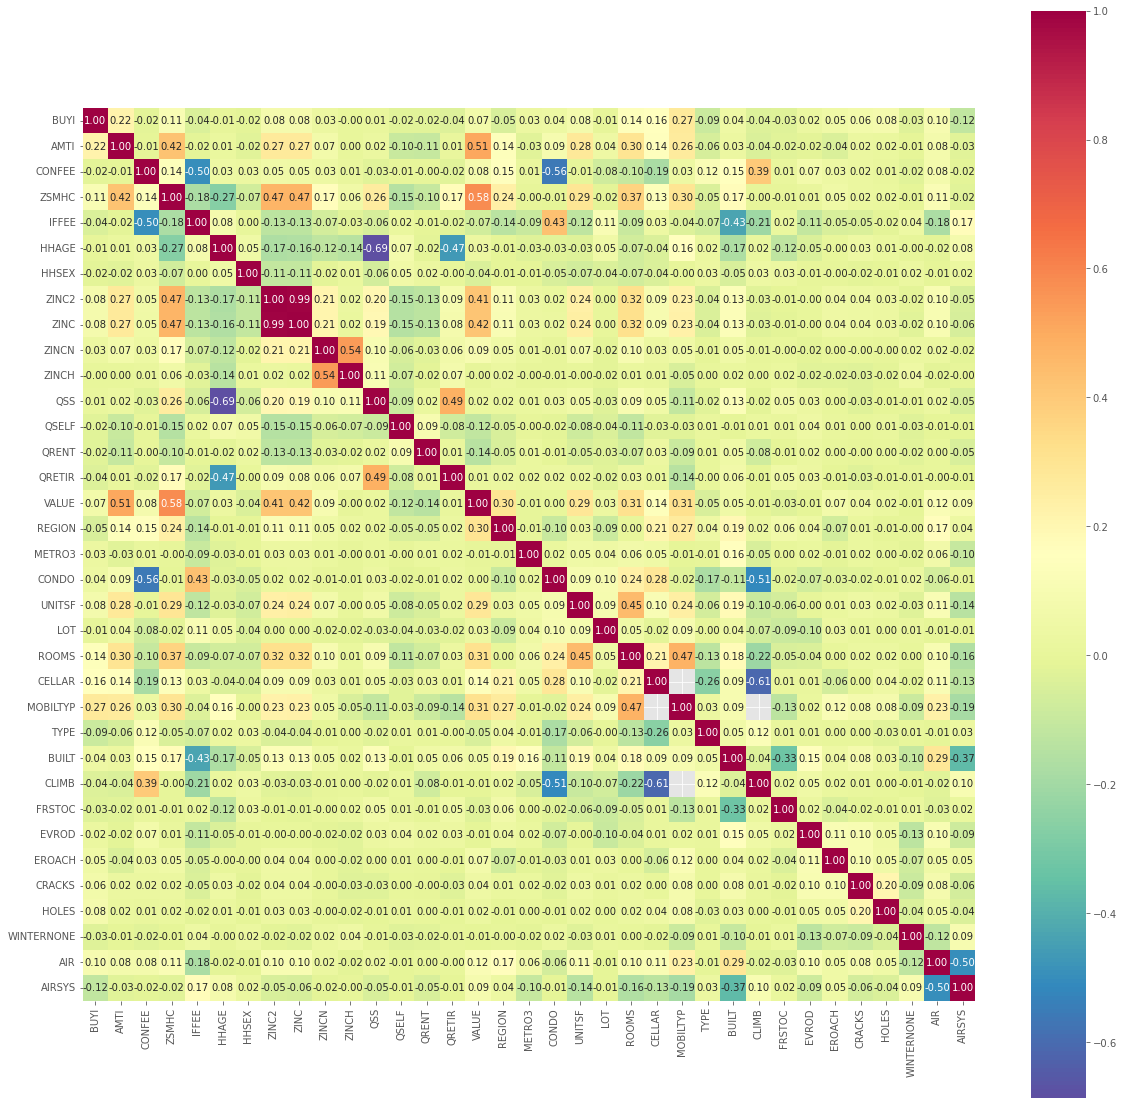

In [13]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r",
                 ax=ax
                 )
plt.show()

Removing columns that have a lot of missing values, and do not correlate with other features (also removing AMTI because it should not be included in the training phase)


In [14]:
dfCopy = df.copy(deep=True)

#This variable will be needed later for the annual profit calculation
amtiValues = df.AMTI

#Dropping the columns
dfCopy.drop(columns=["AMTI","MOBILTYP","FRSTOC","CLIMB"],inplace=True)


In [15]:
dfCopyForProfit = dfCopy.copy(deep=True)

Removing -8 values as they are not allowed

In [16]:
for i in dfCopy.columns:
    dfCopy = dfCopy[dfCopy[i] != -8]

dfCopy

,BUYI,CONFEE,ZSMHC,IFFEE,HHAGE,HHSEX,ZINC2,ZINC,ZINCN,ZINCH,...,CELLAR,TYPE,BUILT,EVROD,EROACH,CRACKS,HOLES,WINTERNONE,AIR,AIRSYS
0,1,115,4240,1.0,34,2,159972,159972,100000,2.0,...,4,1,2002,2,2,2,2,2.0,2,1
1,1,225,3502,1.0,43,1,156772,156772,-6,1.0,...,4,1,2002,2,1,1,2,1.0,2,1
2,1,-6,5014,1.0,60,1,1488496,1488496,-9,NaN,...,4,1,2001,2,2,2,2,1.0,2,1
3,1,215,4609,1.0,37,1,124944,124944,125000,2.0,...,4,1,2001,2,2,2,2,1.0,2,1
4,1,65,4891,1.0,33,2,149972,149972,175000,2.0,...,4,1,1995,2,2,2,2,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51803,1,-6,979,2.0,51,1,94196,94196,-6,1.0,...,2,1,1970,2,2,2,2,1.0,2,1
51804,1,-6,1277,2.0,70,2,66030,66030,-6,1.0,...,1,1,1970,2,2,2,2,1.0,2,1
51805,0,-6,517,2.0,68,2,24998,24999,-6,1.0,...,-6,2,1995,2,2,2,2,1.0,1,2
51806,0,-6,426,2.0,71,2,13132,4000,-6,1.0,...,-6,2,1960,2,2,2,2,2.0,2,2


Replacing the missing values with null in order to fill them

In [17]:
dfCopy.replace({-9:np.nan,-7:np.nan,-6:np.nan},inplace=True)
dfCopyForProfit.replace({-9:np.nan,-7:np.nan,-6:np.nan,-8:np.nan},inplace=True)

Filling the missing values of each column with the mean

In [18]:
for i in dfCopy.columns:
    dfCopy[i] = dfCopy[i].fillna(dfCopy[i].mean())
    dfCopyForProfit[i] = dfCopyForProfit[i].fillna(dfCopyForProfit[i].mean())

dfCopy

,BUYI,CONFEE,ZSMHC,IFFEE,HHAGE,HHSEX,ZINC2,ZINC,ZINCN,ZINCH,...,CELLAR,TYPE,BUILT,EVROD,EROACH,CRACKS,HOLES,WINTERNONE,AIR,AIRSYS
0,1.0,115.000000,4240.0,1.0,34.0,2.0,159972.0,159972.0,100000.000000,2.000000,...,4.000000,1.0,2002.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,1.0,225.000000,3502.0,1.0,43.0,1.0,156772.0,156772.0,86740.706766,1.000000,...,4.000000,1.0,2002.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0
2,1.0,127.344675,5014.0,1.0,60.0,1.0,1488496.0,1488496.0,86740.706766,1.179112,...,4.000000,1.0,2001.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
3,1.0,215.000000,4609.0,1.0,37.0,1.0,124944.0,124944.0,125000.000000,2.000000,...,4.000000,1.0,2001.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
4,1.0,65.000000,4891.0,1.0,33.0,2.0,149972.0,149972.0,175000.000000,2.000000,...,4.000000,1.0,1995.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51803,1.0,127.344675,979.0,2.0,51.0,1.0,94196.0,94196.0,86740.706766,1.000000,...,2.000000,1.0,1970.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
51804,1.0,127.344675,1277.0,2.0,70.0,2.0,66030.0,66030.0,86740.706766,1.000000,...,1.000000,1.0,1970.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
51805,0.0,127.344675,517.0,2.0,68.0,2.0,24998.0,24999.0,86740.706766,1.000000,...,2.672671,2.0,1995.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
51806,0.0,127.344675,426.0,2.0,71.0,2.0,13132.0,4000.0,86740.706766,1.000000,...,2.672671,2.0,1960.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


Creating the features table (x) and the target (y)

In [19]:
y = dfCopy.BUYI
x = dfCopy.drop(["BUYI"],axis=1)

Oversampling (do not use as it lowers score)

In [20]:
"""y_old = dfCopy.BUYI
x_old = dfCopy.drop(["BUYI"],axis=1)

oversample = RandomOverSampler(sampling_strategy=0.5)
x, y = oversample.fit_resample(x_old, y_old)"""

'y_old = dfCopy.BUYI\nx_old = dfCopy.drop(["BUYI"],axis=1)\n\noversample = RandomOverSampler(sampling_strategy=0.5)\nx, y = oversample.fit_resample(x_old, y_old)'

We will use a 5-FOLD training phase for 6 models and compare their results. The models are Decision Trees, Random Forest, Light GBM, SVM, KNN and XG Boost.
c

In [21]:
my_fold = KFold(n_splits = 5,random_state=2020,shuffle = True)

modelsDict = {"Decision Trees":[tree.DecisionTreeClassifier(),0],"XG Boost":[xgb.XGBClassifier(),0],"Light GBM":[ lgb.LGBMClassifier(),0],"Random Forest":[RandomForestClassifier(),0],"Support Vector Machine":[svm.SVC(),0],"KNN":[KNeighborsClassifier(),0]}
score = 0

for i,(train_index,test_index) in enumerate(my_fold.split(x,y)):
    X_train, Y_train = x.iloc[train_index], y.iloc[train_index]
    X_test, Y_test = x.iloc[test_index], y.iloc[test_index]

    for model in modelsDict.keys():
        modelsDict[model][0].fit(X_train,Y_train)
        y_pred = modelsDict[model][0].predict(X_test)
    
        print("Score in fold",i,"for",model,f1_score(y_pred,Y_test))
        modelsDict[model][1] += f1_score(y_pred,Y_test)/5

for model_ in modelsDict.keys():
    print("Average score for",model_,":",modelsDict[model_][1])


Score in fold 0 for Decision Trees 0.9640449438202249
Score in fold 0 for XG Boost 0.9797825972798403
Score in fold 0 for Light GBM 0.9797354052918942
Score in fold 0 for Random Forest 0.9804660905996334
Score in fold 0 for Support Vector Machine 0.9794234384792145
Score in fold 0 for KNN 0.9784534731323722
Score in fold 1 for Decision Trees 0.9662248824283882
Score in fold 1 for XG Boost 0.9800420168067226
Score in fold 1 for Light GBM 0.9809358752166377
Score in fold 1 for Random Forest 0.980817610062893
Score in fold 1 for Support Vector Machine 0.979474591319789
Score in fold 1 for KNN 0.97860513896172
Score in fold 2 for Decision Trees 0.9651299604235747
Score in fold 2 for XG Boost 0.9815203695926081
Score in fold 2 for Light GBM 0.9816999632950553
Score in fold 2 for Random Forest 0.9821437922186731
Score in fold 2 for Support Vector Machine 0.9810179390905299
Score in fold 2 for KNN 0.9798952879581152
Score in fold 3 for Decision Trees 0.9658416635484044
Score in fold 3 for XG 

In [22]:
for model_ in modelsDict.keys():
    print("Average score for",model_,":",modelsDict[model_][1])

Average score for Decision Trees : 0.9657257386696856
Average score for XG Boost : 0.9805909609175631
Average score for Light GBM : 0.981108319640168
Average score for Random Forest : 0.9814610068110189
Average score for Support Vector Machine : 0.9802414565283311
Average score for KNN : 0.9795157569532054


The best model is Random Forest. We will choose it and tune its hyperparameters for better performance

Tuning Random Forest model

In [23]:
my_fold = KFold(n_splits = 5,random_state=2020,shuffle = True)

randomForestScore = 0
for i,(train_index,test_index) in enumerate(my_fold.split(x,y)):
    X_train, Y_train = x.iloc[train_index], y.iloc[train_index]
    X_test, Y_test = x.iloc[test_index], y.iloc[test_index]


    randomForestModel = RandomForestClassifier(n_estimators=160,max_depth=20)
    randomForestModel.fit(X_train,Y_train)
    y_pred = randomForestModel.predict(X_test)

    print("Score in fold",i,f1_score(y_pred,Y_test))
    randomForestScore += f1_score(y_pred,Y_test)/5

    print(confusion_matrix(y_pred,Y_test))

print("Average Score :",randomForestScore)

Score in fold 0 0.9798952879581151
[[  29   19]
 [ 365 9358]]
Score in fold 1 0.9808710235312614
[[  47   19]
 [ 346 9358]]
Score in fold 2 0.9823495521919028
[[  55   28]
 [ 309 9378]]
Score in fold 3 0.9812427957665304
[[  48   27]
 [ 331 9364]]
Score in fold 4 0.9823258732482745
[[  39   14]
 [ 324 9393]]
Average Score : 0.9813369065392168


Confusion matrix of our random forest model predictions

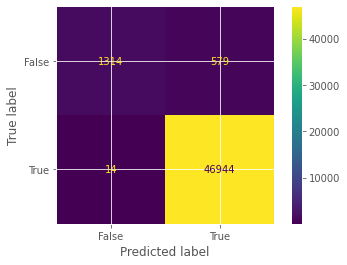

In [24]:
actual = y
predicted = randomForestModel.predict(x)

confusion_matrix = confusion_matrix(actual, predicted)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Calculating the annual profit. The calculation method will be as follows:
Adding 30% of the AMTI column if the model predicts a 1 correctly, and substracting 200 if the model predicts a 1 uncorrectly. Also, we'll always substract 500 as the fee of creating an insurance for a buyer
c

In [25]:
new_x = dfCopyForProfit.drop(columns=['BUYI'],axis=1)
new_y = dfCopyForProfit.BUYI.to_frame()

#Replacing missing values with 0 (for our model)
new_y.replace({-9:0,-7:0,-6:0,-8:0},inplace=True)
new_y = new_y.BUYI

annualProfit = 0

#Predicting the values
prediction = randomForestModel.predict(new_x)

#Iterating over the rows
for idx in range(len(prediction)):
    #If prediction of 1 is correct, add 30% of the profit and subtract 500 usd fees
    if prediction[idx] == 1 and new_y[idx] == 1:
        annualProfit += 1.3 * amtiValues[idx] - 500
    
    #If prediction of 1 is incorrect, subtract 200
    elif new_y[idx] == 1 and prediction[idx] == 0:
        annualProfit -= 200


annualProfit


36471923.20000066